## 1. Project Setup and Data Acquisition

This report analyzes body measurement data from the National Health and Nutrition Examination Survey (NHANES) for adult males and females. The objective is to explore and compare key body measurements, such as weight, height, and various circumferences, and to derive relevant metrics like Body Mass Index (BMI). The analysis will involve data loading, cleaning, descriptive statistics, and visualization to gain insights into the distributions and differences in these measurements between genders.

To begin, we will download the datasets containing body measurements for adult males and females from the specified GitHub repository.

In [47]:
import requests
import pandas as pd

# URLs for the datasets
urls = [
    "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv",
    "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv"
]

# Download each file from the provided URLs
for url in urls:
    filename = url.split('/')[-1]
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Successfully downloaded {filename}")
    else:
        print(f"Failed to download {filename}. Status code: {response.status_code}")

Successfully downloaded nhanes_adult_male_bmx_2020.csv
Successfully downloaded nhanes_adult_female_bmx_2020.csv


In [ ]:
import numpy as np
import pandas as pd

male_df_raw = pd.read_csv('nhanes_adult_male_bmx_2020.csv', sep='\s+', comment='#', header=0)
female_df_raw = pd.read_csv('nhanes_adult_female_bmx_2020.csv', sep='\s+', comment='#', header=0)

if len(male_df_raw.columns) > 0:
    male_col_name = male_df_raw.columns[0]
    male_data = male_df_raw[male_col_name].str.split(',', expand=True)
    male_df = male_data.iloc[1:].copy()
    male_df.columns = male_data.iloc[0].str.replace('"', '')
    male_df = male_df.apply(lambda x: x.str.replace('"', ''))
else:
    male_df = pd.DataFrame()

if len(female_df_raw.columns) > 0:
    female_col_name = female_df_raw.columns[0]
    female_data = female_df_raw[female_col_name].str.split(',', expand=True)
    female_df = female_data.iloc[1:].copy()
    female_df.columns = female_data.iloc[0].str.replace('"', '')
    female_df = female_df.apply(lambda x: x.str.replace('"', ''))
else:
    female_df = pd.DataFrame()

for col in male_df.columns:
    male_df[col] = pd.to_numeric(male_df[col], errors='coerce')

for col in female_df.columns:
    female_df[col] = pd.to_numeric(female_df[col], errors='coerce')

male = male_df.to_numpy()
female = female_df.to_numpy()

print("Data Cleaning and Preparation Summary:")
print(f"- Successfully loaded and parsed data for {male.shape[0]} male and {female.shape[0]} female participants.")
print(f"- Data converted to numpy arrays with {male.shape[1]} columns.")

print("\nFirst 5 rows of Processed Male Data (NumPy Array):")
print(male[:5])
print("\nFirst 5 rows of Processed Female Data (NumPy Array):")
print(female[:5])

Data Cleaning and Preparation Summary:
- Successfully loaded and parsed data for 4080 male and 4220 female participants.
- Data converted to numpy arrays with 7 columns.

First 5 rows of Processed Male Data (NumPy Array):
[[ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]
 [ 90.2 162.5  38.7  38.   37.3 110.2 116.2]]

First 5 rows of Processed Female Data (NumPy Array):
[[ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]
 [ 62.  144.7  32.5  34.2  29.8 106.7  84.8]]


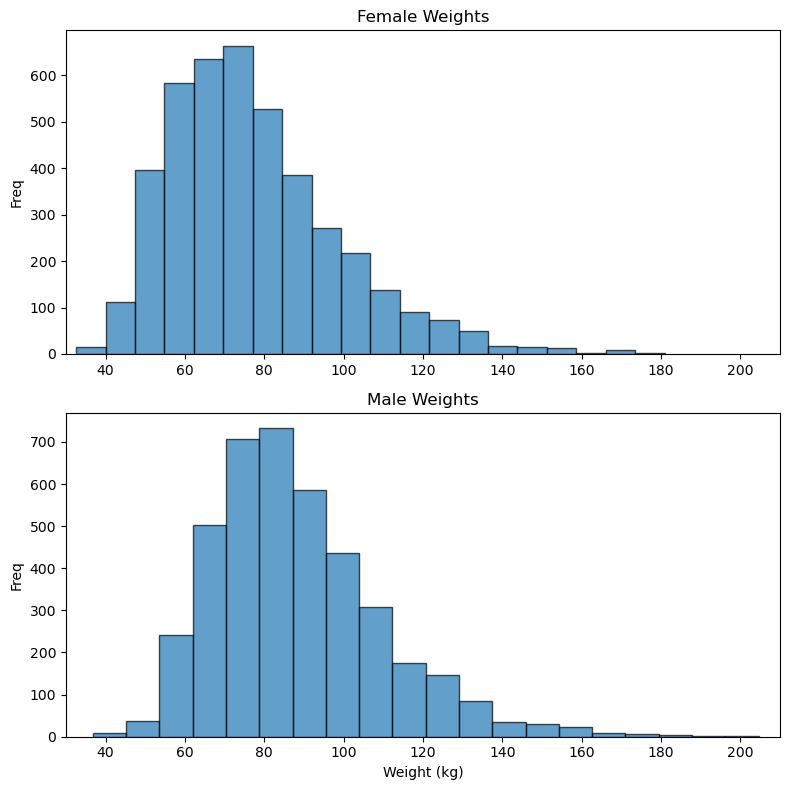

In [43]:
import matplotlib.pyplot as plt
import numpy as np

f_w = female[:, 0]
m_w = male[:, 0]

all_w = np.concatenate((f_w, m_w))
min_w = np.floor(np.min(all_w) / 10) * 10
max_w = np.ceil(np.max(all_w) / 10) * 10

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

axes[0].hist(f_w, bins=20, edgecolor='k', alpha=0.7)
axes[0].set_title('Female Weights')
axes[0].set_ylabel('Freq')
axes[0].set_xlim(min_w, max_w)

axes[1].hist(m_w, bins=20, edgecolor='k', alpha=0.7)
axes[1].set_title('Male Weights')
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Freq')
axes[1].set_xlim(min_w, max_w)

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9040\1796472071.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Female Weights', 'Male Weights'], patch_artist=True)


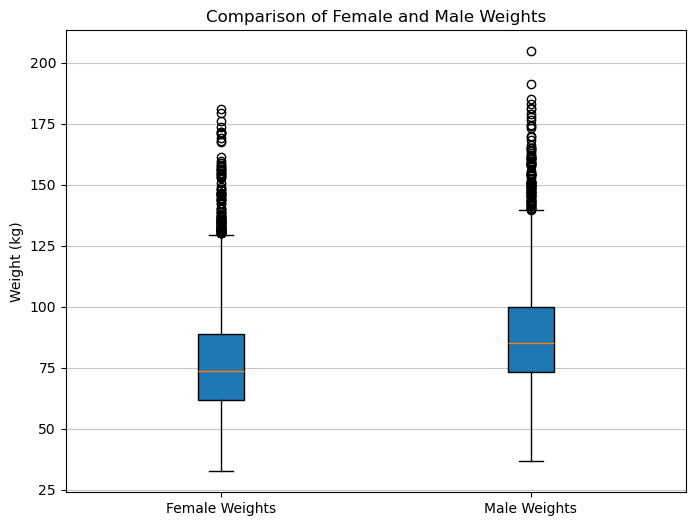

In [31]:
import matplotlib.pyplot as plt
import numpy as np

f_w = female[:, 0]
m_w = male[:, 0]

data_to_plot = [f_w, m_w]

plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=['Female Weights', 'Male Weights'], patch_artist=True)

plt.title('Comparison of Female and Male Weights')
plt.ylabel('Weight (kg)')
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

##**Summary and Discussion (Boxplot):**


*   **Median Weight:** The median weight for males is notably higher than the median weight for females.
*   **Interquartile Range (IQR):** The middle 50% of male weights (represented by the box) shows slightly more variability compared to the middle 50% of female weights.
*   **Overall Range and Outliers:** Males exhibit a wider overall range of weights. Both groups have outliers, with a tendency for more high-weight outliers in the male distribution.






In [32]:
import numpy as np
from scipy.stats import skew, kurtosis

f_w = female[:, 0]
m_w = male[:, 0]

f_mean = np.mean(f_w)
f_median = np.median(f_w)
f_std = np.std(f_w)
f_var = np.var(f_w)
f_skew = skew(f_w)
f_kurt = kurtosis(f_w)

m_mean = np.mean(m_w)
m_median = np.median(m_w)
m_std = np.std(m_w)
m_var = np.var(m_w)
m_skew = skew(m_w)
m_kurt = kurtosis(m_w)

print("Female Weight Aggregates:")
print(f"Mean: {f_mean:.2f}")
print(f"Median: {f_median:.2f}")
print(f"Standard Deviation: {f_std:.2f}")
print(f"Variance: {f_var:.2f}")
print(f"Skewness: {f_skew:.2f}")
print(f"Kurtosis: {f_kurt:.2f}")

print("\nMale Weight Aggregates:")
print(f"Mean: {m_mean:.2f}")
print(f"Median: {m_median:.2f}")
print(f"Standard Deviation: {m_std:.2f}")
print(f"Variance: {m_var:.2f}")
print(f"Skewness: {m_skew:.2f}")
print(f"Kurtosis: {m_kurt:.2f}")

Female Weight Aggregates:
Mean: 77.40
Median: 73.60
Standard Deviation: 21.54
Variance: 464.10
Skewness: 1.03
Kurtosis: 1.40

Male Weight Aggregates:
Mean: 88.36
Median: 85.00
Standard Deviation: 21.42
Variance: 458.86
Skewness: 0.98
Kurtosis: 1.47


In [33]:
import numpy as np

female_weights = female[:, 0]
female_heights_cm = female[:, 1]

female_heights_m = female_heights_cm / 100

female_bmis = female_weights / (female_heights_m ** 2)

female_bmis_col = female_bmis.reshape(-1, 1)

female = np.hstack((female, female_bmis_col))

print("Body Mass Index (BMI) Calculation Summary:")
print(f"- BMI calculated for {female_bmis.shape[0]} female participants.")
print(f"- BMI column added to the female matrix.")
print(f"- New shape of female numpy array: {female.shape}")

print("\nFirst 5 rows of Female Data (NumPy Array) including BMI:")
print(female[:5])

Body Mass Index (BMI) Calculation Summary:
- BMI calculated for 4220 female participants.
- BMI column added to the female matrix.
- New shape of female numpy array: (4220, 8)

First 5 rows of Female Data (NumPy Array) including BMI:
[[ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]
 [ 62.         144.7         32.5         34.2         29.8
  106.7         84.8         29.61110588]]


In [34]:
import numpy as np

# Calculate mean and standard deviation for each column
m = np.mean(female, axis=0)
s = np.std(female, axis=0)

# Handle zero standard deviation
s[s == 0] = 1e-9

zfemale = (female - m) / s

print("Shape of zfemale matrix:", zfemale.shape)
print("\nFirst 5 rows of zfemale matrix:")
print(zfemale[:5])

Shape of zfemale matrix: (4220, 8)

First 5 rows of zfemale matrix:
[[ 0.63598029 -1.05294157 -1.07897923 -1.29326664  1.03226339  1.04503344
   0.26536111  1.15641028]
 [-0.20420267  0.15053717  0.58338189  0.26222137 -0.16215519 -0.19039412
  -0.37267915 -0.25903858]
 [-0.72873679 -0.38748862  0.83912975 -0.76440072 -0.66131519 -0.52325543
  -0.45890081 -0.67015414]
 [-1.02117617 -0.78392867 -0.61010815 -0.98216904 -0.78610519 -1.06735566
  -1.45332392 -0.89266173]
 [-0.71481111 -2.18562744 -1.50522567 -0.91994952 -0.51869804 -0.15838823
  -0.7865431  -0.06324039]]


In [35]:
import numpy as np
import pandas as pd

selected_cols_zfemale = zfemale[:, [1, 0, 6, 5, 7]]

selected_df_zfemale = pd.DataFrame(selected_cols_zfemale, columns=['Height (std)', 'Weight (std)', 'Waist Circ (std)', 'Hip Circ (std)', 'BMI (std)'])

print("Summary: Selected standardized variables for analysis.")
print("Shape of the new DataFrame:", selected_df_zfemale.shape)

# Display the first few rows of the new DataFrame
print("\nFirst 5 rows of DataFrame with selected standardized variables:")
display(selected_df_zfemale.head())

Summary: Selected standardized variables for analysis.
Shape of the new DataFrame: (4220, 5)

First 5 rows of DataFrame with selected standardized variables:


,Height (std),Weight (std),Waist Circ (std),Hip Circ (std),BMI (std)
0,-1.052942,0.635980,0.265361,1.045033,1.156410
1,0.150537,-0.204203,-0.372679,-0.190394,-0.259039
2,-0.387489,-0.728737,-0.458901,-0.523255,-0.670154
3,-0.783929,-1.021176,-1.453324,-1.067356,-0.892662
4,-2.185627,-0.714811,-0.786543,-0.158388,-0.063240


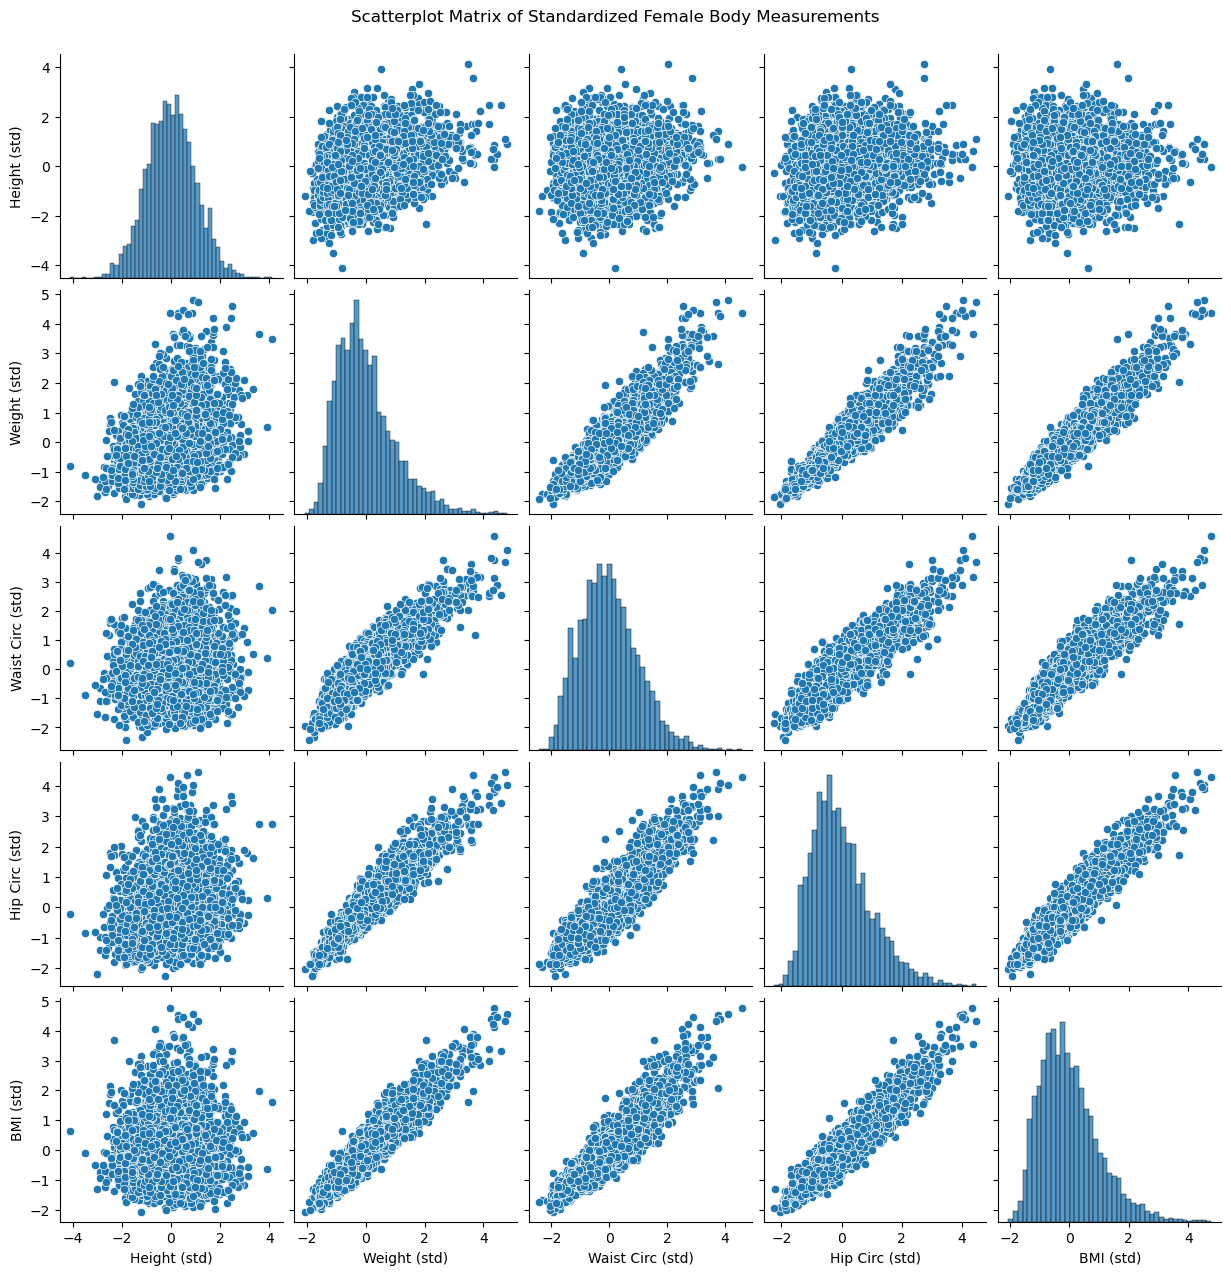

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(selected_df_zfemale)
plt.suptitle('Scatterplot Matrix of Standardized Female Body Measurements', y=1.02)
plt.show()

In [37]:
import pandas as pd
pearson_corr = selected_df_zfemale.corr(method='pearson')
spearman_corr = selected_df_zfemale.corr(method='spearman')

print("Pearson's Correlation Matrix:")
display(pearson_corr)
print("\nSpearman's Correlation Matrix:")
display(spearman_corr)

Pearson's Correlation Matrix:


,Height (std),Weight (std),Waist Circ (std),Hip Circ (std),BMI (std)
Height (std),1.000000,0.345529,0.126563,0.202921,0.033079
Weight (std),0.345529,1.000000,0.904532,0.946544,0.945890
Waist Circ (std),0.126563,0.904532,1.000000,0.897378,0.921179
Hip Circ (std),0.202921,0.946544,0.897378,1.000000,0.944186
BMI (std),0.033079,0.945890,0.921179,0.944186,1.000000



Spearman's Correlation Matrix:


,Height (std),Weight (std),Waist Circ (std),Hip Circ (std),BMI (std)
Height (std),1.000000,0.338901,0.108581,0.205434,0.019873
Weight (std),0.338901,1.000000,0.900123,0.946612,0.937969
Waist Circ (std),0.108581,0.900123,1.000000,0.887980,0.923080
Hip Circ (std),0.205434,0.946612,0.887980,1.000000,0.934161
BMI (std),0.019873,0.937969,0.923080,0.934161,1.000000


**Summary and Discussion:**

*  **Strong positive correlations** are observed between Weight, Waist Circumference, Hip Circumference, and BMI. This indicates a strong tendency for these measurements to increase together. Pearson and Spearman coefficients are high (mostly > 0.9), confirming strong linear/monotonic relationships.
*   **Moderate positive correlations** exist between Height and Weight, and Height and Hip Circumference. Taller females tend to have higher weights and hip circumferences, but the relationship is not as strong as among the other variables (coefficients around 0.2-0.3).
*   **Weak or negligible** correlations are found between Height and Waist Circumference, and Height and BMI. The scatterplots are dispersed, and coefficients are close to zero, suggesting little linear or monotonic association.
*   The similarity between Pearson's and Spearman's coefficients indicates that the relationships are largely linear.





In [38]:
import numpy as np

f_wc = female[:, 6]  # Waist Circumference (female)
f_ht = female[:, 1]  # Height (female)
f_hc = female[:, 5]  # Hip Circumference (female)

f_ht[f_ht == 0] = 1e-9
f_hc[f_hc == 0] = 1e-9

# Compute ratios for females
f_wc_ht_ratio = f_wc / f_ht
f_wc_hc_ratio = f_wc / f_hc

# Reshape ratios to be column vectors
f_wc_ht_ratio_col = f_wc_ht_ratio.reshape(-1, 1)
f_wc_hc_ratio_col = f_wc_hc_ratio.reshape(-1, 1)

# Add the new ratio columns to the female matrix
female = np.hstack((female, f_wc_ht_ratio_col, f_wc_hc_ratio_col))

m_wc = male[:, 6]  # Waist Circumference (male)
m_ht = male[:, 1]  # Height (male)
m_hc = male[:, 5]  # Hip Circumference (male)

m_ht[m_ht == 0] = 1e-9
m_hc[m_hc == 0] = 1e-9

# Compute ratios for males
m_wc_ht_ratio = m_wc / m_ht
m_wc_hc_ratio = m_wc / m_hc

# Reshape ratios to be column vectors
m_wc_ht_ratio_col = m_wc_ht_ratio.reshape(-1, 1)
m_wc_hc_ratio_col = m_wc_hc_ratio.reshape(-1, 1)

# Add the new ratio columns to the male matrix
male = np.hstack((male, m_wc_ht_ratio_col, m_wc_hc_ratio_col))


print("Ratio Calculation Summary:")
print(f"- Waist circumference to height ratio and waist circumference to hip circumference ratio calculated for both male and female participants.")
print(f"- Two new columns added to the female matrix. New shape: {female.shape}")
print(f"- Two new columns added to the male matrix. New shape: {male.shape}")

# Display the first 5 rows of the matrices with the new columns
print("\nFirst 5 rows of Female Data (NumPy Array) including Ratios:")
print(female[:5])
print("\nFirst 5 rows of Male Data (NumPy Array) including Ratios:")
print(male[:5])

Ratio Calculation Summary:
- Waist circumference to height ratio and waist circumference to hip circumference ratio calculated for both male and female participants.
- Two new columns added to the female matrix. New shape: (4220, 10)
- Two new columns added to the male matrix. New shape: (4080, 9)

First 5 rows of Female Data (NumPy Array) including Ratios:
[[ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037   0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496   0.5707196    0.86629002]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849   0.57496823   0.8960396 ]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132   0.47347995   0.79135135]
 [ 62.         144.7         32.5         34.2         29.8
  106.7         84.8         29.61110588   0.58604008   0.79475164]]


In [39]:
import numpy as np
import pandas as pd

male_df_raw = pd.read_csv('nhanes_adult_male_bmx_2020.csv', sep='\s+', comment='#', header=0)
female_df_raw = pd.read_csv('nhanes_adult_female_bmx_2020.csv', sep='\s+', comment='#', header=0)

if len(male_df_raw.columns) > 0:
    male_col_name = male_df_raw.columns[0]
    male_data = male_df_raw[male_col_name].str.split(',', expand=True)
    male_df = male_data.iloc[1:].copy()
    male_df.columns = male_data.iloc[0].str.replace('"', '')
    male_df = male_df.apply(lambda x: x.str.replace('"', ''))
else:
    male_df = pd.DataFrame()

if len(female_df_raw.columns) > 0:
    female_col_name = female_df_raw.columns[0]
    female_data = female_df_raw[female_col_name].str.split(',', expand=True)
    female_df = female_data.iloc[1:].copy()
    female_df.columns = female_data.iloc[0].str.replace('"', '')
    female_df = female_df.apply(lambda x: x.str.replace('"', ''))
else:
     female_df = pd.DataFrame()

for col in male_df.columns:
    male_df[col] = pd.to_numeric(male_df[col], errors='coerce')

for col in female_df.columns:
    female_df[col] = pd.to_numeric(female_df[col], errors='coerce')

male = male_df.to_numpy()
female = female_df.to_numpy()

f_wc = female[:, 6]  # Waist Circumference (female)
f_ht = female[:, 1]  # Height (female)
f_hc = female[:, 5]  # Hip Circumference (female)

# Handle potential division by zero
f_ht_safe = np.where(f_ht == 0, 1e-9, f_ht)
f_hc_safe = np.where(f_hc == 0, 1e-9, f_hc)

# Compute ratios for females
f_wc_ht_ratio = f_wc / f_ht_safe
f_wc_hc_ratio = f_wc / f_hc_safe

# Reshape ratios to be column vectors
f_wc_ht_ratio_col = f_wc_ht_ratio.reshape(-1, 1)
f_wc_hc_ratio_col = f_wc_hc_ratio.reshape(-1, 1)

if female.shape[1] == 7:
    female = np.hstack((female, f_wc_ht_ratio_col, f_wc_hc_ratio_col))
elif female.shape[1] == 8:

     female = np.hstack((female, f_wc_ht_ratio_col, f_wc_hc_ratio_col))
     print("Note: Female matrix already had 8 columns (likely BMI). Ratios appended after existing columns.")
else:
    print(f"Warning: Unexpected number of columns in female matrix ({female.shape[1]}). Appending ratios.")
    female = np.hstack((female, f_wc_ht_ratio_col, f_wc_hc_ratio_col))

m_wc = male[:, 6]  # Waist Circumference (male)
m_ht = male[:, 1]  # Height (male)
m_hc = male[:, 5]  # Hip Circumference (male)

# Handle potential division by zero
m_ht_safe = np.where(m_ht == 0, 1e-9, m_ht)
m_hc_safe = np.where(m_hc == 0, 1e-9, m_hc)

# Compute ratios for males
m_wc_ht_ratio = m_wc / m_ht_safe
m_wc_hc_ratio = m_wc / m_hc_safe

# Reshape ratios to be column vectors
m_wc_ht_ratio_col = m_wc_ht_ratio.reshape(-1, 1)
m_wc_hc_ratio_col = m_wc_hc_ratio.reshape(-1, 1)

# Add the new ratio columns to the male matrix
male = np.hstack((male, m_wc_ht_ratio_col, m_wc_hc_ratio_col))


print("Ratio Calculation Summary:")
print(f"- Waist circumference to height ratio and waist circumference to hip circumference ratio calculated for both male and female participants.")
print(f"- Two new columns added to the female matrix. New shape: {female.shape}")
print(f"- Two new columns added to the male matrix. New shape: {male.shape}")

# Display the first 5 rows of the matrices with the new columns
print("\nFirst 5 rows of Female Data (NumPy Array) including Ratios:")
print(female[:5])
print("\nFirst 5 rows of Male Data (NumPy Array) including Ratios:")
print(male[:5])

Ratio Calculation Summary:
- Waist circumference to height ratio and waist circumference to hip circumference ratio calculated for both male and female participants.
- Two new columns added to the female matrix. New shape: (4220, 9)
- Two new columns added to the male matrix. New shape: (4080, 9)

First 5 rows of Female Data (NumPy Array) including Ratios:
[[ 91.1        152.7         33.5         33.          38.5
  125.5        103.1          0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.           0.5707196    0.86629002]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5          0.57496823   0.8960396 ]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2          0.47347995   0.79135135]
 [ 62.         144.7         32.5         34.2         29.8
  106.7         84.8          0.58604008   0.79475164]]

First 5 rows of Male Data (NumPy Array) including Ratios:
[[ 74.3

C:\Users\HP\AppData\Local\Temp\ipykernel_9040\931967747.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=box_labels, patch_artist=True)


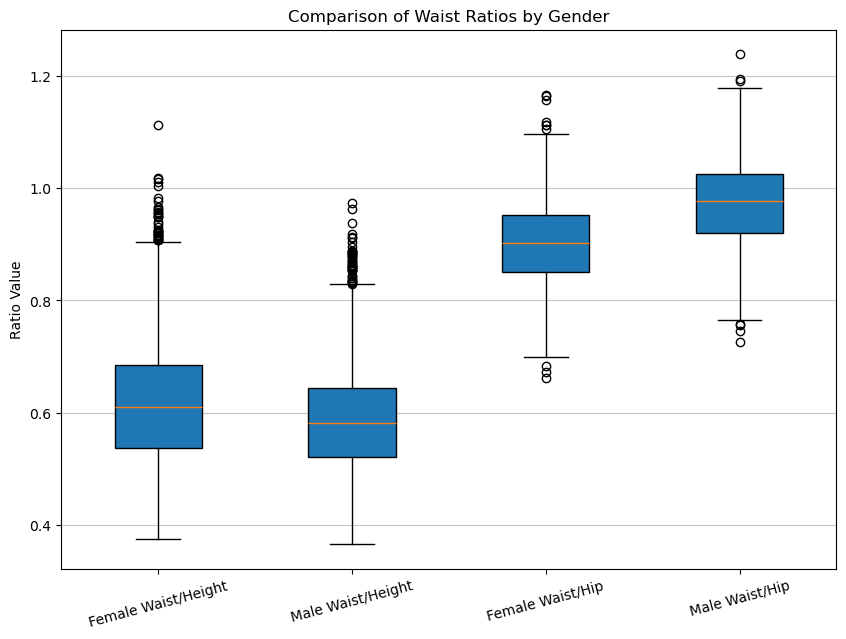

In [40]:
import matplotlib.pyplot as plt
import numpy as np

f_wc_ht = female[:, -2]
f_wc_hc = female[:, -1]

m_wc_ht = male[:, -2]
m_wc_hc = male[:, -1]

data_to_plot = [f_wc_ht, m_wc_ht, f_wc_hc, m_wc_hc]

box_labels = ['Female Waist/Height', 'Male Waist/Height', 'Female Waist/Hip', 'Male Waist/Hip']

plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=box_labels, patch_artist=True)

plt.title('Comparison of Waist Ratios by Gender')
plt.ylabel('Ratio Value')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.xticks(rotation=15)

plt.show()

**Summary and Discussion (Waist Ratios Boxplot):**
*   **Waist-to-Height Ratio:** The median waist-to-height ratio appears lower for males compared to females. Both distributions show a range of values, with some outliers. The male distribution seems slightly more compact in the interquartile range.
*   **Waist-to-Hip Ratio:** The median waist-to-hip ratio is notably lower for females compared to males. The distribution for males appears shifted towards higher values. Both groups show outliers, with a wider range for males.
*   **Comparison between Ratios:** The waist-to-hip ratios generally appear higher than the waist-to-height ratios for both genders. The difference in median values between genders seems more pronounced for the waist-to-hip ratio.

In summary, the boxplot indicates gender differences in both waist-to-height and waist-to-hip ratios, with males generally having a lower waist-to-height ratio and a higher waist-to-hip ratio compared to females in this dataset.




## Discussion of Body Composition Metrics: BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio

Different anthropometric measurements and derived ratios offer various perspectives on body composition and health risks. Here, we discuss the advantages and disadvantages of Body Mass Index (BMI), Waist-to-Height Ratio (WHtR), and Waist-to-Hip Ratio (WHR).

### Body Mass Index (BMI)

BMI is a widely used metric calculated as weight (kg) divided by the square of height (m).

**Advantages:**

*   **Simplicity and Accessibility:** BMI is easy to calculate using only weight and height, making it readily accessible in various settings.
*   **Population-Level Screening:** It is useful for screening large populations and identifying potential weight categories (underweight, normal weight, overweight, obese).
*   **Correlation with Health Risks:** At a population level, BMI generally correlates with certain health risks, particularly those associated with higher body fat.

**Disadvantages:**

*   **Does Not Distinguish Body Composition:** BMI does not differentiate between muscle mass and fat mass. An individual with high muscle mass might have a high BMI and be classified as overweight or obese, even if they have low body fat.
*   **Insensitive to Fat Distribution:** BMI does not account for where fat is stored in the body. Abdominal fat (visceral fat) is associated with higher health risks than subcutaneous fat, and BMI does not capture this.
*   **Variations Across Populations:** The relationship between BMI and health risks can vary across different ethnicities and age groups.

### Waist-to-Height Ratio (WHtR)

WHtR is calculated as waist circumference divided by height.

**Advantages:**

*   **Accounts for Central Obesity:** WHtR provides an indication of central obesity (abdominal fat), which is a significant risk factor for cardiovascular disease and other metabolic conditions.
*   **Relatively Simple Measurement:** Waist circumference and height are relatively easy measurements to obtain.
*   **May be a Better Predictor of Health Risks than BMI:** Some studies suggest that WHtR may be a better predictor of certain health risks, particularly cardiovascular risks, than BMI.

**Disadvantages:**

*   **Measurement Standardization:** Obtaining a standardized waist circumference measurement can be challenging and subject to variations depending on the measurement site and technique.
*   **Less Established Cut-off Points:** While there are general guidelines (e.g., keeping your waist circumference less than half your height), universally accepted and standardized cut-off points for WHtR across all populations are still evolving compared to BMI.

### Waist-to-Hip Ratio (WHR)

WHR is calculated as waist circumference divided by hip circumference.

**Advantages:**

*   **Indicates Fat Distribution Pattern:** WHR provides insight into the pattern of fat distribution (android or apple shape vs. gynoid or pear shape), which is related to health risks. A higher WHR (more abdominal fat) is associated with increased health risks.
*   **Relatively Simple Measurement:** Waist and hip circumferences are relatively easy measurements to obtain.

**Disadvantages:**

*   **Measurement Standardization:** Similar to WHtR, standardizing the measurement of both waist and hip circumferences can be inconsistent.
*   **May be Influenced by Hip Size:** While intended to assess abdominal fat relative to lower body fat, WHR can be influenced by hip size, which may not always directly reflect health risks associated with abdominal fat.
*   **Less Universally Applicable:** While useful, its interpretation and applicability can vary across different populations and age groups.

In summary, while BMI is a simple and widely used screening tool, WHtR and WHR offer valuable complementary information by providing insights into fat distribution, which is a crucial factor in assessing health risks. Utilizing a combination of these metrics can provide a more comprehensive understanding of an individual's body composition and associated health profile.

In [41]:
import numpy as np

zfemale_bmi = zfemale[:, 7]

lowest_bmi_indices = np.argsort(zfemale_bmi)[:5]

highest_bmi_indices = np.argsort(zfemale_bmi)[-5:]

selected_indices = np.concatenate((lowest_bmi_indices, highest_bmi_indices))

selected_zfemale_data = zfemale[selected_indices, :]

print("Standardized Body Measurements for 5 Lowest and 5 Highest BMI Female Participants:")
print(selected_zfemale_data)

print("\nOriginal Indices of these participants:")
print(selected_indices)

Standardized Body Measurements for 5 Lowest and 5 Highest BMI Female Participants:
[[-2.0795282  -1.22284445 -1.54785032 -1.1688276  -2.19444948 -2.04033488
  -1.94191331 -2.05000262]
 [-1.87992672 -0.18926859 -1.71834889  0.38666041 -2.44402948 -1.85470068
  -2.05687552 -1.99464225]
 [-1.5364265   1.80709026  0.62600653  0.57331897 -2.26575805 -1.67546767
  -1.70624078 -1.97064622]
 [-1.84279156 -0.26006146 -0.22648635  0.51109945 -2.30141234 -2.25157379
  -1.85569165 -1.94153833]
 [-1.61069682  0.88678299 -0.09861242  0.47998969 -2.21227663 -1.82909597
  -1.71198889 -1.89295821]
 [ 4.2473745   0.29212291  1.86212121 -0.98216904  2.36929911  4.10479704
   3.81769338  4.39672482]
 [ 4.45625977  0.50450151  1.69162264 -1.13771784  3.34979198  3.98317464
   2.90374381  4.46224439]
 [ 4.34949618  0.27796433  2.84248803  1.94214841  4.36593913  3.91916285
   3.75446416  4.51490209]
 [ 4.80440188  0.88678299  2.11786908  1.81770937  3.77764341  4.02158171
   4.08210646  4.54294243]
 [ 4.363

**Summary and Discussion:**

Examining the standardized body measurements for the individuals at the extremes of the BMI distribution provides valuable insights:

*   **Lowest BMI Participants:** The standardized measurements for participants with the lowest BMI are generally negative across most body measurements (weight, height, circumferences). This is expected, as lower BMI is associated with lower weight and often smaller body dimensions. The strongly negative values indicate that these individuals' measurements are significantly below the average for the female group. For example, a standardized weight of -2.079 means the participant's weight is over 2 standard deviations below the mean female weight.
*   **Highest BMI Participants:** Conversely, the standardized measurements for participants with the highest BMI are predominantly positive and often quite large. This indicates that these individuals' measurements are significantly above the average for the female group. For instance, a standardized weight of 4.804 means the participant's weight is almost 5 standard deviations above the mean female weight. High positive standardized values for weight, waist circumference, hip circumference, and BMI are particularly noticeable in this group, which aligns with the definition of high BMI.
*   **Comparison:** The stark contrast between the standardized measurements in the lowest and highest BMI groups highlights how the z-score transformation effectively shows the relative position of an individual's measurements within the distribution of the entire group. Individuals with low BMI tend to have measurements well below the average, while those with high BMI have measurements well above the average across various body dimensions.

This analysis of individuals at the extreme ends of the BMI spectrum provides a concrete illustration of how the different body measurements contribute to a person's BMI and how these measurements deviate from the average in cases of very low or very high BMI.